## 线性SVM决策过程的可视化

In [1]:
#导入需要的模块
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

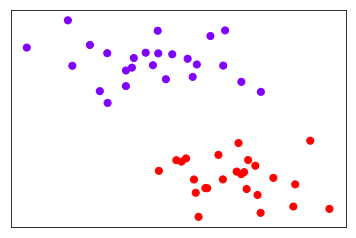

In [2]:
#实例化数据集，可视化数据集
X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

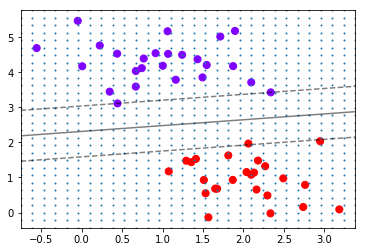

In [3]:
#画决策边界

#绘制原数据集散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#在最大值和最小值之间形成30个规律的数据，并生成网格
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
axisy,axisx = np.meshgrid(axisy,axisx)
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
plt.scatter(xy[:,0],xy[:,1],s=1);

#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)
#返回每个输入的样本所对应的到决策边界的距离


#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1] 
           ,alpha=0.5
           ,linestyles=["--","-","--"])

ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [4]:
#===========================绘制决策边界代码详解【begin】===============================#

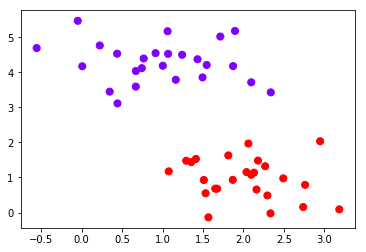

In [5]:
#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow") 
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

In [6]:
#获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [7]:
#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

In [8]:
axisx,axisy = np.meshgrid(axisx,axisy)
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标

In [9]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点

In [10]:
xy.shape

(900, 2)

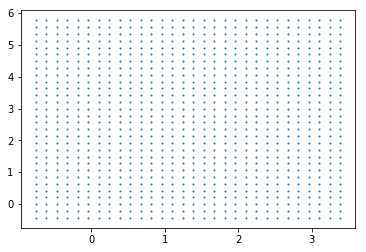

In [11]:
plt.scatter(xy[:,0],xy[:,1],s=1);

In [12]:
#理解函数meshgrid和vstack的作用
a = np.array([1,2,3])
b = np.array([7,8])

In [13]:
v1,v2 = np.meshgrid(a,b)

In [16]:
v = np.vstack([v1.ravel(), v2.ravel()]).T

In [18]:
#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致

In [20]:
Z.shape

(30, 30)

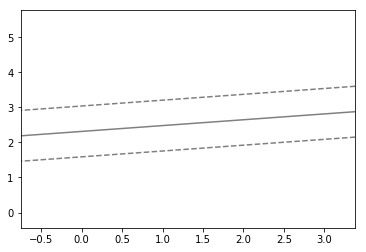

In [28]:
#画决策边界和平行于决策边界的超平面
ax = plt.gca() #获取当前子图
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           ,alpha=0.5
           ,linestyles=["--","-","--"])

ax.set_xlim(xlim)
ax.set_ylim(ylim);

In [29]:
#===========================绘制决策边界代码详解【end】===============================#

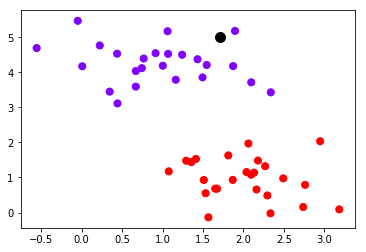

In [35]:
#以第10号样本为例
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=100);

In [39]:
#计算第10号样本到决策边界的距离
clf.decision_function(X[10].reshape(1,2)) #-3.33917354

array([-3.33917354])

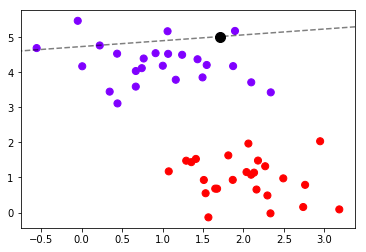

In [42]:
#绘制决策边界
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=100)

ax = plt.gca() 
ax.contour(axisx,axisy,Z
            ,colors="k"
            ,levels=[-3.33917354]
            ,alpha=0.5
            ,linestyles=["--"]);

In [46]:
#定义SVC可视化函数
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"]) 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()

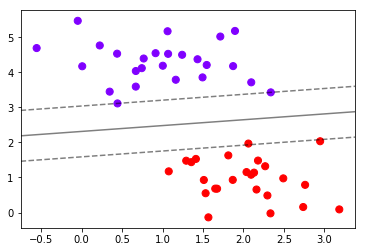

In [47]:
#则整个绘图过程可以写作：

#SVC绘图
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [48]:
#探索建好的模型
clf.predict(X)
#根据决策边界，对X中的样本进行分类，返回的结构为n_samples

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [49]:
clf.score(X,y)
#返回给定测试数据和标签的平均准确度

1.0

In [50]:
clf.support_vectors_
#返回支持向量

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [51]:
clf.n_support_
#返回每个类中支持向量的个数

array([2, 1])

### **练习：**把支持向量进行可视化（结合之前的决策边界的可视化）

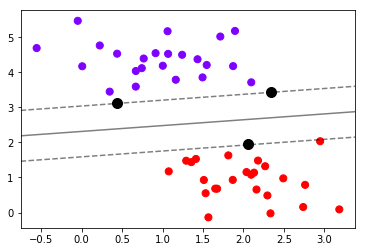

In [56]:
#绘制支持向量
clf = SVC(kernel = "linear").fit(X,y)              #训练模型
SV = clf.support_vectors_                          #得到支持向量     
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow") #绘制原数据集散点图
plt.scatter(SV[:,0],SV[:,1],c='k',s=100)           #绘制支持向量
plot_svc_decision_function(clf)                    #绘制决策边界

### 推广到非线性情况

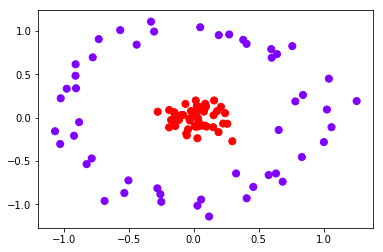

In [107]:
from sklearn.datasets import make_circles

#创建环形数据
X,y = make_circles(100, factor=0.1, noise=.1, random_state=10)
#绘制可视化图形
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow");

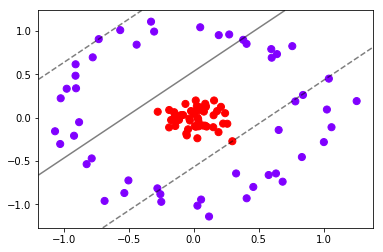

In [108]:
#尝试用我们已经定义的函数来划分这个数据的决策边界
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [113]:
#为非线性数据增加维度并绘制3D图像

from mpl_toolkits import mplot3d #导入3D绘图包

#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))

In [124]:
#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

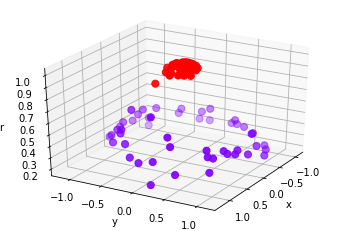

In [125]:
#测试函数运行结果    
plot_3D()

## 非线性SVM

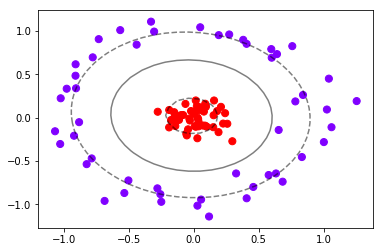

In [126]:
#改变核函数
clf = SVC(kernel = "rbf",gamma='auto').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

##  探索核函数在不同数据集上的表现

In [143]:
#导入相应模块和包
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification

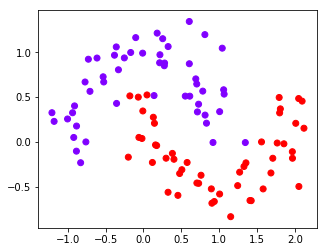

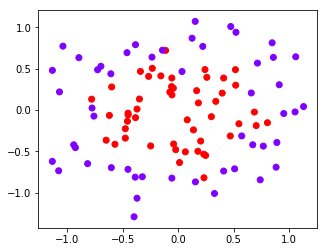

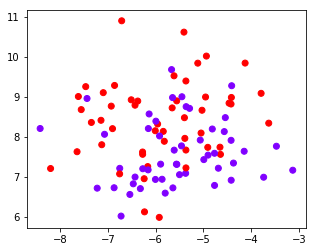

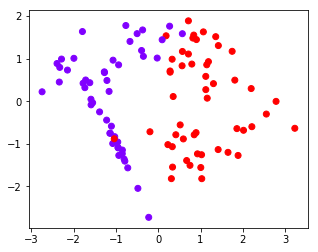

In [153]:
#创建数据集
n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples,n_features = 2,n_informative=2,n_redundant=0, random_state=5)
    ]

#四个数据集分别是什么样子呢？
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,cmap="rainbow")

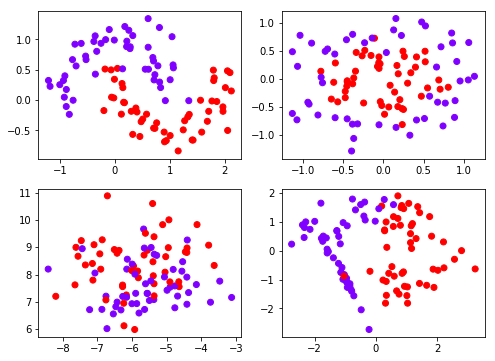

In [171]:
#如果想要把四个数据集放在一张画布上
plt.figure(figsize=(8,6))
for i,(X,Y) in enumerate(datasets):
    plt.subplot(2,2,i+1)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap="rainbow")

D:\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


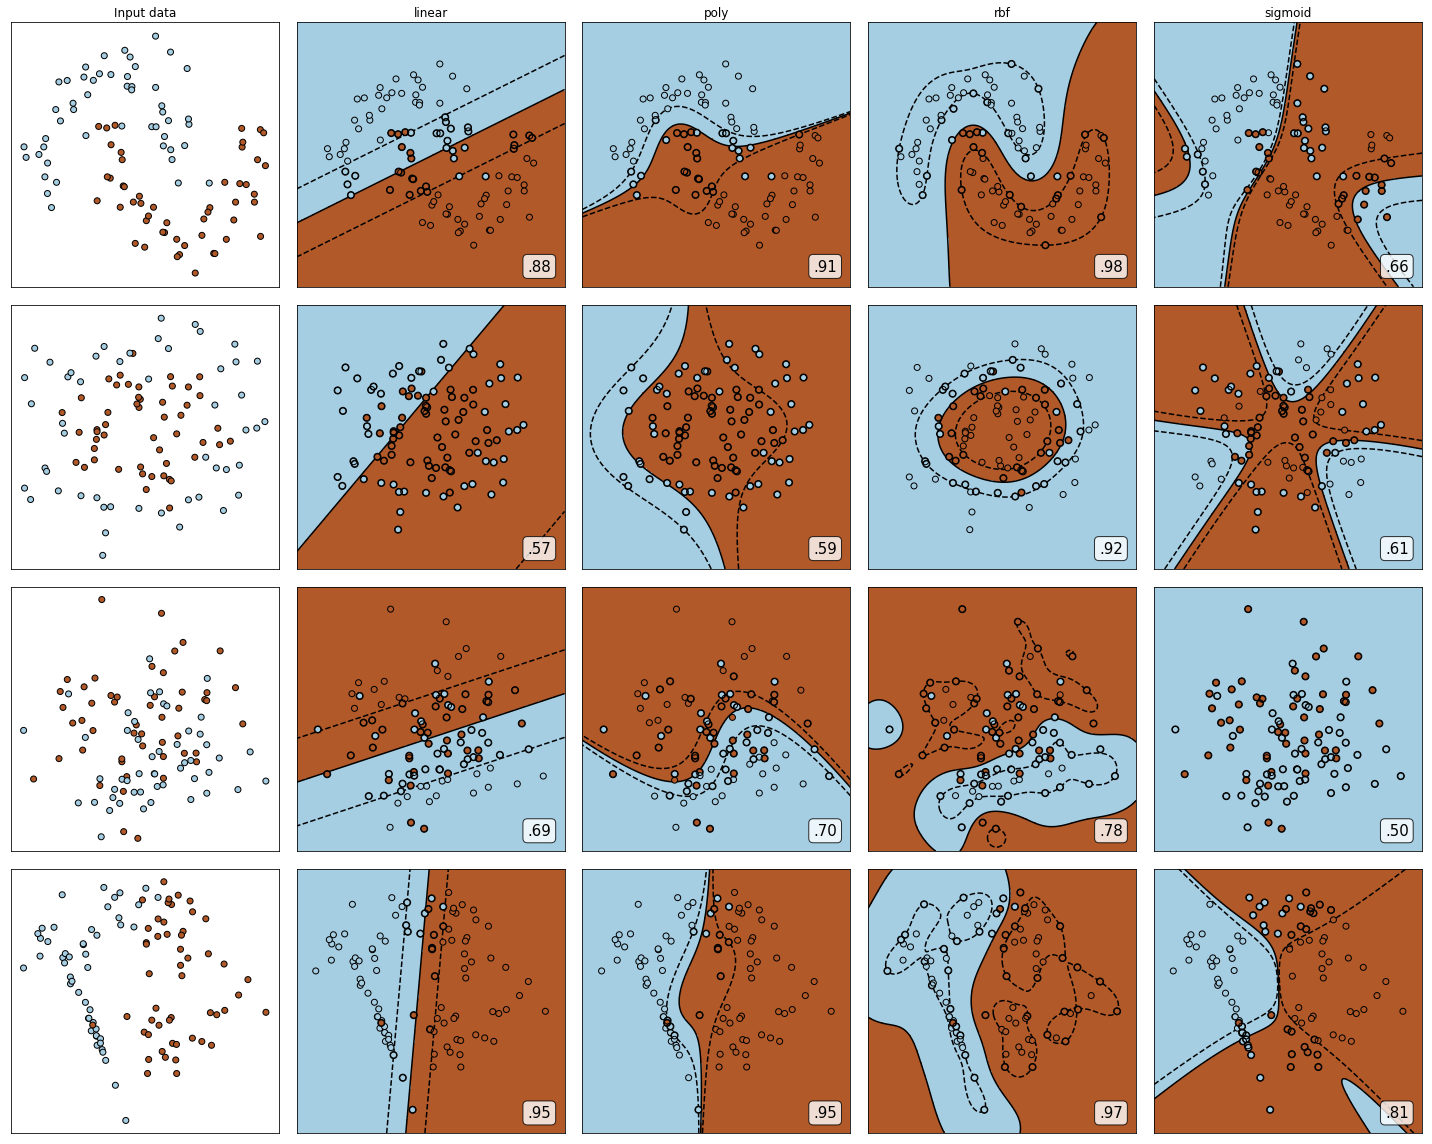

In [177]:
#定义核种类
Kernel = ["linear","poly","rbf","sigmoid"]

#构建子图
nrows=len(datasets)
ncols=len(Kernel) + 1
fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

#第一层循环：在不同的数据集中循环
for ds_cnt, (X,Y) in enumerate(datasets):
    
    #在图像中的第一列，放置原数据的分布
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks([])
    ax.set_yticks([])
    
    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):
        
        #定义子图位置
        ax = axes[ds_cnt, est_idx + 1]
        
        #建模
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        
        #绘制图像本身分布的散点图
        ax.scatter(X[:, 0], X[:, 1], c=Y
                   ,zorder=10,cmap=plt.cm.Paired,edgecolors='k')
        
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                    facecolors='none', zorder=10, edgecolors='k')
        
        #绘制决策边界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        
        #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1, 0, 1])
        
        #设定坐标轴为不显示
        ax.set_xticks([])
        ax.set_yticks([])
        
        #将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        #为每张图添加分类的分数   
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
                , size=15    #字体的大小
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
                #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向
               )

plt.tight_layout()
plt.show()

## 探索核函数的优势和缺陷

In [1]:
#探索核函数的优势和缺陷
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
X.shape

(569, 30)

In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [ ]:
#=================【time warning:+∞ 】===============#

Kernel = ["linear","poly","rbf","sigmoid"]

for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:317154


In [5]:
#去掉多项式核函数
Kernel = ["linear","rbf","sigmoid"]

for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:337162
The accuracy under kernel rbf is 0.596491
00:00:021940
The accuracy under kernel sigmoid is 0.596491
00:00:005985


In [6]:
#如果数据是线性的，可以把多项式核函数的degree设为1
Kernel = ["linear","poly","rbf","sigmoid"]

for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:316155
The accuracy under kernel poly is 0.923977
00:00:036939
The accuracy under kernel rbf is 0.596491
00:00:020946
The accuracy under kernel sigmoid is 0.596491
00:00:006941


In [7]:
#查看数据量纲
import pandas as pd
data = pd.DataFrame(X)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
2,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
3,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
5,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
6,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
7,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
8,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
9,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [8]:
#数据标准化消除量纲不统一问题
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
data = pd.DataFrame(X)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,569.0,-3.162867e-15,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
1,569.0,-6.530609e-15,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
2,569.0,-7.078891e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
3,569.0,-8.799835e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
4,569.0,6.132177e-15,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
5,569.0,-1.120369e-15,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
6,569.0,-4.421380e-16,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
7,569.0,9.732500e-16,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
8,569.0,-1.971670e-15,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
9,569.0,-1.453631e-15,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

Kernel = ["linear","poly","rbf","sigmoid"]

for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.976608
00:00:003949
The accuracy under kernel poly is 0.964912
00:00:001994
The accuracy under kernel rbf is 0.970760
00:00:003990
The accuracy under kernel sigmoid is 0.953216
00:00:002993


0.9766081871345029 1.2340816326530613


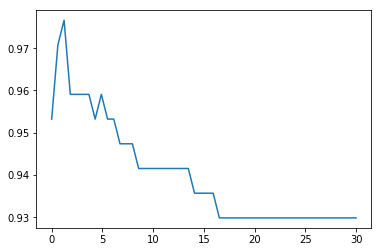

In [15]:
#参数 C 的学习曲线

#调线性核函数
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="linear",C=i).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9824561403508771 6.7424489795918365


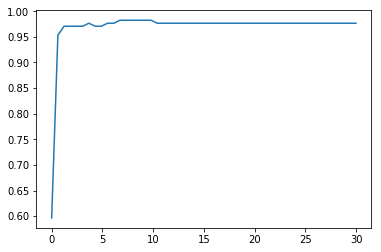

In [16]:
#换rbf
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.012).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9824561403508771 6.26530612244898


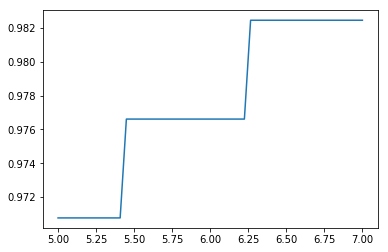

In [17]:
#进一步细化
score = []
C_range = np.linspace(5,7,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.012).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

### 样本不均衡问题：class_weight

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

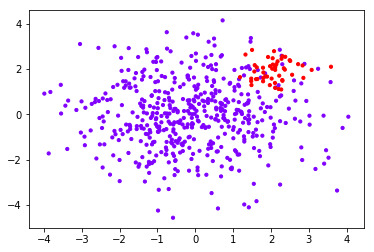

In [22]:
class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10);
#其中红色点是少数类，紫色点是多数类

In [26]:
#不设定class_weight
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

#设定class_weight
wclf = SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

#给两个模型分别打分看看，这个分数是accuracy准确度
clf.score(X,y)

0.9418181818181818

In [27]:
wclf.score(X,y)

0.9127272727272727